<a href="https://colab.research.google.com/github/madhumitav26/Faster_RCNN_Opencv/blob/main/UROP_OBJDET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DATA PREPROCESSING**

In [1]:
!pip install pycocotools


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
save_dir = '/content/drive/My Drive/AI/Dataset'


In [4]:
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

# Load pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [5]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


In [6]:
food_category_labels = [
    'apple', 'banana', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake'
]


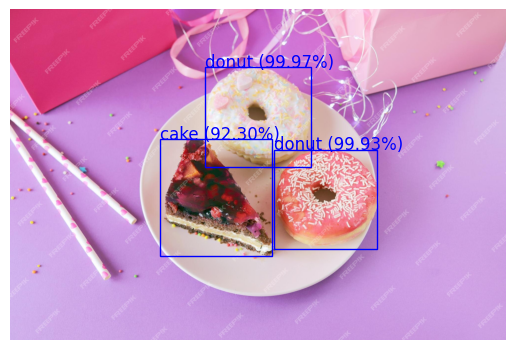

In [7]:
import torch
import torchvision.transforms.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchvision.ops import nms

# Load and preprocess your input image
image_path = '/content/cakedon.jpg'
image = Image.open(image_path)
image_tensor = F.to_tensor(image).unsqueeze(0)

# Perform inference
with torch.no_grad():
    predictions = model(image_tensor)

# Extract predicted boxes, labels, and scores
boxes = predictions[0]['boxes']
labels = predictions[0]['labels']
scores = predictions[0]['scores']

# Set a threshold for confidence score
threshold = 0.5  # You can adjust this threshold as needed

# Apply non-maximum suppression (NMS) to filter out duplicate bounding boxes
keep_indices = nms(boxes, scores, iou_threshold=0.5)  # Adjust the IoU threshold as needed

# Visualize predictions on the original image
fig, ax = plt.subplots(1)
ax.imshow(image)

for idx in keep_indices:
    box, label, score = boxes[idx], labels[idx], scores[idx]
    x, y, x_max, y_max = box
    label_name = COCO_INSTANCE_CATEGORY_NAMES[label]

    # Check if the label corresponds to a food category
    if label_name in food_category_labels and score > threshold:
        # Convert the score to a percentage
        confidence_percentage = score * 100

        # Create a rectangle patch with blue edge color
        rect = patches.Rectangle((x, y), x_max - x, y_max - y, linewidth=1, edgecolor='blue', facecolor='none')

        # Add the patch to the plot
        ax.add_patch(rect)

        # Display label text with object label and percentage
        label_text = f"{label_name} ({confidence_percentage:.2f}%)"
        ax.text(x, y, label_text, color='blue', fontsize=12)

plt.axis('off')
plt.show()


In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Load a pre-trained model (e.g., ResNet-50)
model = torchvision.models.resnet50(pretrained=True)

# Create a dummy dataset
dummy_transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
dummy_dataset = torchvision.datasets.FakeData(size=1000, num_classes=10, transform=dummy_transform)
dummy_dataloader = torch.utils.data.DataLoader(dummy_dataset, batch_size=32, shuffle=True)

# Define a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Collect loss values
losses = []

for epoch in range(5):  # You can adjust the number of epochs
    running_loss = 0.0
    for i, data in enumerate(dummy_dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 10 == 9:  # Print every 10 mini-batches
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 10:.3f}")
            running_loss = 0.0
    losses.append(running_loss)

# Plot the loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()


[Epoch 1, Batch 10] Loss: 7.591
[Epoch 1, Batch 20] Loss: 4.872
[Epoch 1, Batch 30] Loss: 3.144
[Epoch 2, Batch 10] Loss: 1.295
[Epoch 2, Batch 20] Loss: 1.150
[Epoch 2, Batch 30] Loss: 1.122
[Epoch 3, Batch 10] Loss: 0.279
[Epoch 3, Batch 20] Loss: 0.251
[Epoch 3, Batch 30] Loss: 0.246


In [ ]:
import torch
from pycocotools.coco import COCO
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import torchvision.transforms as T
from torchvision.transforms.functional import to_tensor
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchvision.ops import box_iou

# Load the COCO annotations file (replace with your actual path)
annotations_file = '/content/drive/My Drive/AI/Dataset/annotations.json'
coco = COCO(annotations_file)

# Load the pretrained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define a transform to preprocess images
transform = T.Compose([T.ToPILImage(), T.Resize((800, 800)), T.ToTensor()])

# Iterate over COCO validation images
image_ids = coco.getImgIds()
metrics = []

for image_id in image_ids:
    # Load and preprocess the image
    image_data = coco.loadImgs(image_id)[0]
    image_path = '/content/drive/My Drive/AI/Dataset/test2014' + image_data['file_name']
    image = transform(Image.open(image_path)).unsqueeze(0)

    # Perform inference
    with torch.no_grad():
        predictions = model(image)

    # Retrieve predicted boxes, labels, and scores
    boxes = predictions[0]['boxes']
    labels = predictions[0]['labels']

    # Get ground truth annotations for the image
    annotation_ids = coco.getAnnIds(imgIds=image_id, iscrowd=False)
    annotations = coco.loadAnns(annotation_ids)
    gt_boxes = [ann['bbox'] for ann in annotations]
    gt_labels = [ann['category_id'] for ann in annotations]

    # Calculate IoU between predicted and ground truth boxes
    iou = box_iou(boxes, torch.tensor(gt_boxes))

    # Define a threshold for a positive detection
    detection_threshold = 0.5

    # Calculate accuracy, precision, and recall
    true_positives = (iou > detection_threshold).sum().item()
    false_positives = len(boxes) - true_positives
    false_negatives = len(gt_boxes) - true_positives

    accuracy = true_positives / (true_positives + false_positives + false_negatives)
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    metrics.append({
        'image_id': image_id,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
    })

'''# Visualize results (optional)
for metric in metrics:
    image_data = coco.loadImgs(metric['image_id'])[0]
    image_path = '/path/to/images/' + image_data['file_name']  # Replace with your image directory
    image = Image.open(image_path)

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for box in gt_boxes:
        x, y, w, h = box
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='green', facecolor='none')
        ax.add_patch(rect)

    for i in range(len(boxes)):
        x, y, w, h = boxes[i]
        label = labels[i]
        label_name = coco.loadCats(label)[0]['name']
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='blue', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, label_name, color='blue', fontsize=12)

    plt.axis('off')
    plt.show() '''

# Calculate average metrics
total_accuracy = sum(metric['accuracy'] for metric in metrics) / len(metrics)
total_precision = sum(metric['precision'] for metric in metrics) / len(metrics)
total_recall = sum(metric['recall'] for metric in metrics) / len(metrics)

print("Average Accuracy:", total_accuracy)
print("Average Precision:", total_precision)
print("Average Recall:", total_recall)


In [ ]:
import os
import shutil
from pycocotools.coco import COCO

# Define the COCO annotations file and categories to extract
annotation_file = 'Users/madhumita_v/Downloads/annotations/annotations.json'  # Replace with your annotations file path
categories_to_extract = ['apple', 'banana', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake']  # Replace with your desired categories

# Define the source and target directories for images
source_image_dir = '/Users/madhumita_v/Downloads/test2014'  # Replace with the path to your COCO images directory
target_image_dir = 'Users/madhumita_v/Downloads/Dataset'  # Replace with the path where you want to store the selected images

# Create the target directory if it doesn't exist
os.makedirs(target_image_dir, exist_ok=True)

# Load COCO annotations
coco = COCO(annotation_file)

# Get image IDs for specific categories
category_ids = coco.getCatIds(catNms=categories_to_extract)
image_ids = []
for cat_id in category_ids:
    image_ids.extend(coco.getImgIds(catIds=cat_id))

# Copy selected images to the target directory
for img_id in image_ids:
    img_info = coco.loadImgs(img_id)[0]
    img_filename = img_info['file_name']
    source_path = os.path.join(source_image_dir, img_filename)
    target_path = os.path.join(target_image_dir, img_filename)
    shutil.copy(source_path, target_path)

print(f"Extracted {len(image_ids)} images to {target_image_dir}")

